In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("churn.csv")
df = df.iloc[:, 1:]
features = df.columns.drop('Churn')

def mean_sd(x):
    return f"{x.mean():.2f} ({x.std():.2f})"
# Overall
overall = df[features].apply(mean_sd)
# Churn = 0
group_0 = df[df['Churn'] == 0][features].apply(mean_sd)
# Churn = 1
group_1 = df[df['Churn'] == 1][features].apply(mean_sd)
table1 = pd.DataFrame({
    'Overall': overall,
    'Churn = 0': group_0,
    'Churn = 1': group_1
})
print(table1)


                                   Overall          Churn = 0  \
Call  Failure                  7.54 (7.55)        7.60 (7.27)   
Complains                      0.21 (0.41)        0.01 (0.11)   
Subscription  Length          32.20 (8.79)       32.50 (8.06)   
Charge  Amount                 0.62 (1.28)        1.02 (1.61)   
Seconds of Use           3288.58 (3708.95)  5010.53 (4385.11)   
Frequency of use             53.28 (52.10)      77.42 (59.77)   
Frequency of SMS             45.11 (84.86)     74.42 (110.19)   
Distinct Called Numbers      18.84 (15.67)      25.29 (17.04)   
Age Group                      2.78 (0.82)        2.76 (0.92)   
Tariff Plan                    1.05 (0.23)        1.10 (0.30)   
Status                         1.46 (0.50)        1.17 (0.38)   
Age                           30.46 (7.99)       30.29 (8.97)   
Customer Value             313.81 (417.27)    502.82 (510.13)   

                                 Churn = 1  
Call  Failure                  7.48 (7.83)  

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('churn.csv')
df = df.iloc[:, 1:]
print("Missing values per column:\n", df.isnull().sum())

X = df.drop('Churn', axis=1)
y = df['Churn']  #  0/1


categorical_cols = ['Age Group', 'Tariff Plan', 'Status']
X = pd.get_dummies(X, columns=categorical_cols)

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train value counts:\n", y_train.value_counts())
print("y_test value counts:\n", y_test.value_counts())


Missing values per column:
 Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64
X_train shape: (891, 19)
X_test shape: (99, 19)
y_train value counts:
 Churn
1    446
0    445
Name: count, dtype: int64
y_test value counts:
 Churn
0    50
1    49
Name: count, dtype: int64


In [3]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import random
seed = 777
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# model（the first one， totally 4 models）
model = Sequential([
    Dense(42, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # 20% neuron randomly dropped
    Dense(24, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5041 - loss: 0.6847 - val_accuracy: 0.7667 - val_loss: 0.5975
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7373 - loss: 0.5710 - val_accuracy: 0.8000 - val_loss: 0.5033
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7963 - loss: 0.4876 - val_accuracy: 0.8000 - val_loss: 0.4361
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8191 - loss: 0.4210 - val_accuracy: 0.8222 - val_loss: 0.3977
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8381 - loss: 0.3920 - val_accuracy: 0.8333 - val_loss: 0.3754
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8431 - loss: 0.3746 - val_accuracy: 0.8444 - val_loss: 0.3624
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8230 - loss: 0.3618 - val_accuracy: 0.8667 - val_loss: 0.3556
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8343 - loss: 0.3518 - val_accuracy: 0.8556 - val_loss: 0.

In [4]:
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history2 = model2.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

test_loss2, test_acc2 = model2.evaluate(X_test, y_test, verbose=0)
print(f"Model2 Test Accuracy: {test_acc2:.4f}")

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5049 - loss: 0.7359 - val_accuracy: 0.4778 - val_loss: 0.6423
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5219 - loss: 0.6191 - val_accuracy: 0.7333 - val_loss: 0.5702
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7658 - loss: 0.5464 - val_accuracy: 0.8000 - val_loss: 0.5111
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8301 - loss: 0.4844 - val_accuracy: 0.8111 - val_loss: 0.4625
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8357 - loss: 0.4345 - val_accuracy: 0.8333 - val_loss: 0.4215
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8444 - loss: 0.3934 - val_accuracy: 0.8333 - val_loss: 0.3900
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8481 - loss: 0.3617 - val_accuracy: 0.8222 - val_loss: 0.3680
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8539 - loss: 0.3395 - val_accuracy: 0.8556 - val_loss: 0.

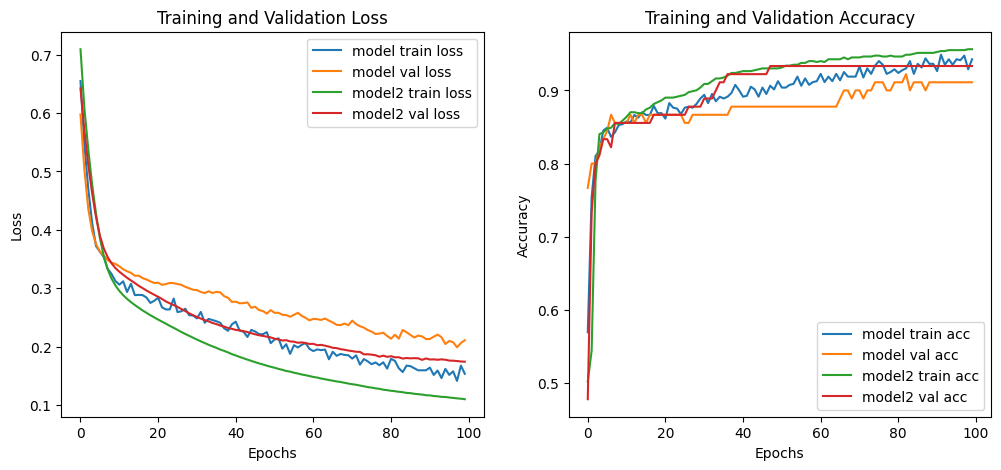

Model test accuracy: 0.9091
Model2 test accuracy: 0.9293


In [5]:
import matplotlib.pyplot as plt
# history = model.fit(...)
# history2 = model2.fit(...)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='model train loss')
plt.plot(history.history['val_loss'], label='model val loss')
plt.plot(history2.history['loss'], label='model2 train loss')
plt.plot(history2.history['val_loss'], label='model2 val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='model train acc')
plt.plot(history.history['val_accuracy'], label='model val acc')
plt.plot(history2.history['accuracy'], label='model2 train acc')
plt.plot(history2.history['val_accuracy'], label='model2 val acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

loss1, acc1 = model.evaluate(X_test, y_test, verbose=0)
loss2, acc2 = model2.evaluate(X_test, y_test, verbose=0)
print(f"Model test accuracy: {acc1:.4f}")
print(f"Model2 test accuracy: {acc2:.4f}")


In [6]:
# (model3)
model3 = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # 30% neuron randomly dropped
    Dense(30, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history3 = model3.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

test_loss3, test_acc3 = model3.evaluate(X_test, y_test, verbose=0)
print(f"Model3 Test Accuracy: {test_acc3:.4f}")

Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6776 - loss: 0.6203 - val_accuracy: 0.8000 - val_loss: 0.4296
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8023 - loss: 0.4365 - val_accuracy: 0.8333 - val_loss: 0.3790
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8427 - loss: 0.3955 - val_accuracy: 0.8556 - val_loss: 0.3579
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8532 - loss: 0.3519 - val_accuracy: 0.8556 - val_loss: 0.3492
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8413 - loss: 0.3451 - val_accuracy: 0.8556 - val_loss: 0.3379
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8331 - loss: 0.3467 - val_accuracy: 0.8556 - val_loss: 0.3324
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8626 - loss: 0.3212 - val_accuracy: 0.8556 - val_loss: 0.3255
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8584 - loss: 0.3151 - val_accuracy: 0.8556 - val_loss: 0.

model4

In [16]:
# (model4)
model4 = Sequential([
    Dense(80, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # 30% neuron randomly dropped
    Dense(30, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model4.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history4 = model4.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

test_loss4, test_acc4 = model4.evaluate(X_test, y_test, verbose=0)
print(f"Model4 Test Accuracy: {test_acc4:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5557 - loss: 0.7189 - val_accuracy: 0.8000 - val_loss: 0.4673
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7805 - loss: 0.4735 - val_accuracy: 0.8444 - val_loss: 0.3985
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8119 - loss: 0.4079 - val_accuracy: 0.8667 - val_loss: 0.3708
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8360 - loss: 0.3735 - val_accuracy: 0.8556 - val_loss: 0.3624
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8512 - loss: 0.3551 - val_accuracy: 0.8556 - val_loss: 0.3504
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8435 - loss: 0.3451 - val_accuracy: 0.8556 - val_loss: 0.3470
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8537 - loss: 0.3368 - val_accuracy: 0.8556 - val_loss: 0.3412
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8502 - loss: 0.3358 - val_accuracy: 0.8556 -

model VS model3

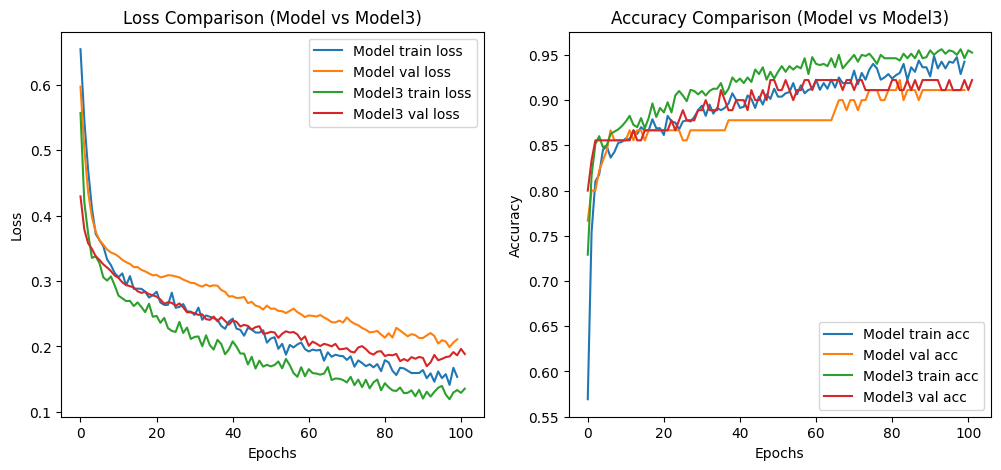

Model Test Accuracy : 0.9091
Model3 Test Accuracy: 0.9192


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Model train loss')
plt.plot(history.history['val_loss'], label='Model val loss')
plt.plot(history3.history['loss'], label='Model3 train loss')
plt.plot(history3.history['val_loss'], label='Model3 val loss')
plt.title('Loss Comparison (Model vs Model3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Model train acc')
plt.plot(history.history['val_accuracy'], label='Model val acc')
plt.plot(history3.history['accuracy'], label='Model3 train acc')
plt.plot(history3.history['val_accuracy'], label='Model3 val acc')
plt.title('Accuracy Comparison (Model vs Model3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Test Accuracy
loss1, acc1 = model.evaluate(X_test, y_test, verbose=0)
loss3, acc3 = model3.evaluate(X_test, y_test, verbose=0)

print(f"Model Test Accuracy : {acc1:.4f}")
print(f"Model3 Test Accuracy: {acc3:.4f}")


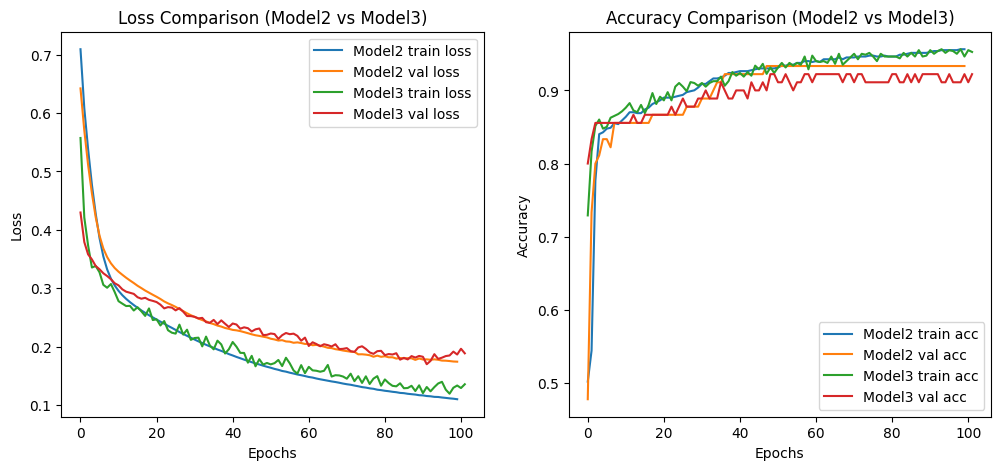

Model2 Test Accuracy: 0.9293
Model3 Test Accuracy: 0.9192


In [ ]:

# Model2 vs Model3
plt.figure(figsize=(12,5))
#Loss
plt.subplot(1,2,1)
plt.plot(history2.history['loss'], label='Model2 train loss')
plt.plot(history2.history['val_loss'], label='Model2 val loss')
plt.plot(history3.history['loss'], label='Model3 train loss')
plt.plot(history3.history['val_loss'], label='Model3 val loss')
plt.title('Loss Comparison (Model2 vs Model3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Accuracy
plt.subplot(1,2,2)
plt.plot(history2.history['accuracy'], label='Model2 train acc')
plt.plot(history2.history['val_accuracy'], label='Model2 val acc')
plt.plot(history3.history['accuracy'], label='Model3 train acc')
plt.plot(history3.history['val_accuracy'], label='Model3 val acc')
plt.title('Accuracy Comparison (Model2 vs Model3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Test Accuracy
loss2, acc2 = model2.evaluate(X_test, y_test, verbose=0)
loss3, acc3 = model3.evaluate(X_test, y_test, verbose=0)

print(f"Model2 Test Accuracy: {acc2:.4f}")
print(f"Model3 Test Accuracy: {acc3:.4f}")


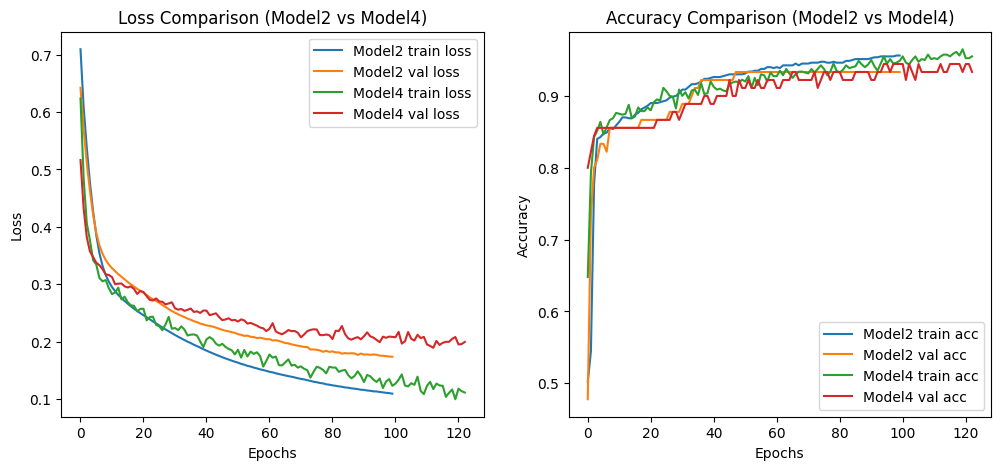

Model2 Test Accuracy : 0.9293
Model4 Test Accuracy: 0.9293


In [ ]:
# Model2 vs Model4

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history2.history['loss'], label='Model2 train loss')
plt.plot(history2.history['val_loss'], label='Model2 val loss')
plt.plot(history4.history['loss'], label='Model4 train loss')
plt.plot(history4.history['val_loss'], label='Model4 val loss')
plt.title('Loss Comparison (Model2 vs Model4)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history2.history['accuracy'], label='Model2 train acc')
plt.plot(history2.history['val_accuracy'], label='Model2 val acc')
plt.plot(history4.history['accuracy'], label='Model4 train acc')
plt.plot(history4.history['val_accuracy'], label='Model4 val acc')
plt.title('Accuracy Comparison (Model2 vs Model4)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Test Accuracy
loss2, acc2 = model2.evaluate(X_test, y_test, verbose=0)
loss4, acc4 = model4.evaluate(X_test, y_test, verbose=0)


print(f"Model2 Test Accuracy : {acc2:.4f}")
print(f"Model4 Test Accuracy: {acc4:.4f}")

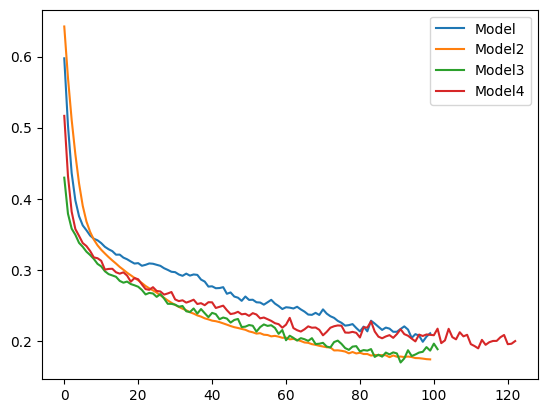

In [ ]:
plt.plot(history.history['val_loss'], label='Model')
plt.plot(history2.history['val_loss'], label='Model2')
plt.plot(history3.history['val_loss'], label='Model3')
plt.plot(history4.history['val_loss'], label='Model4')
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import roc_auc_score

def evaluate_model(model, X_test, y_test, name):
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    y_prob = model.predict(X_test)
    auc = roc_auc_score(y_test, y_prob)

    print(f"{name} Test Accuracy: {test_acc:.4f}")
    print(f"{name} ROC-AUC: {auc:.4f}\n")


evaluate_model(model, X_test, y_test, "Model")
evaluate_model(model2, X_test, y_test, "Model2")
evaluate_model(model3, X_test, y_test, "Model3")
evaluate_model(model4, X_test, y_test, "Model4")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model Test Accuracy: 0.9091
Model ROC-AUC: 0.9592

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Model2 Test Accuracy: 0.9293
Model2 ROC-AUC: 0.9596

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Model3 Test Accuracy: 0.9192
Model3 ROC-AUC: 0.9600

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Model4 Test Accuracy: 0.9293
Model4 ROC-AUC: 0.9616

